<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/aajtakanalysisbasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [95]:
df= pd.read_json("/content/drive/MyDrive/enhanceduserdatabeta1.json", lines=True)

In [96]:
df.head()

,_index,_type,_id,_score,_source
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
3,enhanceduserdatabeta1,core2,AXGidneQutugd-ZqVE1I,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
4,enhanceduserdatabeta1,core2,AXGidvgrCFpND4aqB-8w,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."


In [97]:
df.shape

(107600, 5)

In [ ]:
'''def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out'''

In [100]:
'''flat = flatten_json(str(z))
#json_normalize(flat)'''

In [111]:
y=pd.json_normalize(df._source)

In [112]:
y

,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,subcategory,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4970-4fd9-bd0d-240a5113d18b,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
3,49491,2020-04-22,,,None,false,medium,790aa1ad_f20d_4367_b2c2_d68c3349ae84,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_movie_masala_news_on_films...,https://m.aajtak.in/movie-masala/news-on-films...,2227547380,,7.430573e+18,4031165888,

In [114]:
con= pd.concat([df, y], axis=1)

In [115]:
con.head(20)

,_index,_type,_id,_score,_source,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,...,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,"{'publisher_id': '49491', 'date': '2020-04-22'...",49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,...,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,"{'publisher_id': '49491', 'date': '2020-04-22'...",49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,...,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,"{'publisher_id': '49491', 'date': '2020-04-22'...",49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,...,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4

In [116]:
con= con.drop("_source", axis=1)

In [123]:
con.head(20)

,_index,_type,_id,_score,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,subcategory,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4970-4fd9-bd0d-240a5113d18b,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
3,enhanceduserdatabeta1,core2,AXGidneQutugd-ZqVE1I,1,49491,2020-04-22,,,None,false,medium,790aa1ad_

In [121]:
con.to_csv("aajtaknew.csv")

### News Category classification using Machine Learning

In [ ]:
con["refcurrentoriginal"]

In [ ]:
con["audience_segment"]

In [124]:
columns = ['refcurrentoriginal', 'audience_segment']
df_updated = pd.DataFrame(con, columns=columns)

In [130]:
df_updated.head()

,refcurrentoriginal,audience_segment
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,
2,https://m.aajtak.in/national/video/sapna-chaud...,
3,https://m.aajtak.in/movie-masala/news-on-films...,
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,


In [128]:
df_updated.audience_segment.value_counts()

                             68617
art.and.entertainment         9457
technology.and.computing      7000
health.and.fitness            6387
law.govt.and.politics         5584
society                       3516
religion.and.spirituality     1763
news                          1329
finance                        935
business.and.industrial        623
shopping                       410
sports                         396
home.and.garden                385
science                        304
style.and.fashion              255
travel                         202
food.and.drink                 137
education                      115
family.and.parenting            75
automotive.and.vehicles         47
hobbies.and.interests           36
careers                         12
pets                            12
real.estate                      3
Name: audience_segment, dtype: int64

In [129]:
df_updated.isna().sum()

refcurrentoriginal    8129
audience_segment         0
dtype: int64

In [131]:
df_updated.shape

(107600, 2)

### dropping the nan values as we cannot use any kind of preprocessing here due to maintain the authenticity of the dataset

In [132]:
df_merge= df_updated.dropna()

In [133]:
df_merge.shape

(99471, 2)

In [134]:
df_merge.head()

,refcurrentoriginal,audience_segment
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,
2,https://m.aajtak.in/national/video/sapna-chaud...,
3,https://m.aajtak.in/movie-masala/news-on-films...,
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
lr= LabelEncoder()

In [137]:
df_merge["segment"]= lr.fit_transform(df_merge.audience_segment)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
df_merge.reset_index(inplace=True)

In [158]:
df_merge.head(114)

,index,refcurrentoriginal,audience_segment,segment
0,0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,0
1,1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,0
2,2,https://m.aajtak.in/national/video/sapna-chaud...,,0
3,3,https://m.aajtak.in/movie-masala/news-on-films...,,0
4,4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,0
...,...,...,...,...
109,109,https://www.indiatoday.in/,,0
110,110,https://www.indiatoday.in/,,0
111,111,https://www.indiatoday.in/,,0
112,112,https://www.indiatoday.in/msn-itt/story/fact-c...,,0


In [197]:
df_merge['result'] = df_merge['news'].map(lambda x: x.lstrip('http www').rstrip('aAbBcC'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
df_merge.head()

,index,refcurrentoriginal,audience_segment,segment,news,result
0,0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,0,aajtak khabar ab tak stori cast base censu hap...,aajtak khabar ab tak stori cast base censu hap...
1,1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,0,aajtak karyakram da tak video crime women stop,aajtak karyakram da tak video crime women stop
2,2,https://m.aajtak.in/national/video/sapna-chaud...,,0,aajtak nation video sapna chaudhari danc show ...,aajtak nation video sapna chaudhari danc show ...
3,3,https://m.aajtak.in/movie-masala/news-on-films...,,0,aajtak movi masala news film stori shahid kapo...,aajtak movi masala news film stori shahid kapo...
4,4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,0,aajtak karyakram kismat konnect video kismat c...,aajtak karyakram kismat konnect video kismat c...


In [139]:
df_merge.segment.value_counts()

0     60488
1      9457
22     7000
9      6387
12     5584
19     3516
16     1763
13     1329
7       935
3       623
18      410
20      396
11      385
17      304
21      255
23      202
8       137
5       115
6        75
2        47
10       36
14       12
4        12
15        3
Name: segment, dtype: int64

### data preprocessing using nltk and getting our x and y for predictions

In [140]:
y= df_merge.segment

In [148]:
df_merge["refcurrentoriginal"]= df_merge["refcurrentoriginal"].astype("str")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("popular")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [199]:
df_merge.head(2)

,index,refcurrentoriginal,audience_segment,segment,news,result
0,0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,0,http aajtak khabar ab tak stori cast base cens...,aajtak khabar ab tak stori cast base censu hap...
1,1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,0,http aajtak karyakram da tak video crime women...,aajtak karyakram da tak video crime women stop


In [200]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus=[]
for i in range(0,len(df_merge)):
  print(i)
  review= re.sub("[^a-zA-Z]", " ", df_merge["result"][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review= " ".join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
94471
94472
94473
94474
94475
94476
94477
94478
94479
94480
94481
94482
94483
94484
94485
94486
94487
94488
94489
94490
94491
94492
94493
94494
94495
94496
94497
94498
94499
94500
94501
94502
94503
94504
94505
94506
94507
94508
94509
94510
94511
94512
94513
94514
94515
94516
94517
94518
94519
94520
94521
94522
94523
94524
94525
94526
94527
94528
94529
94530
94531
94532
94533
94534
94535
94536
94537
94538
94539
94540
94541
94542
94543
94544
94545
94546
94547
94548
94549
94550
94551
94552
94553
94554
94555
94556
94557
94558
94559
94560
94561
94562
94563
94564
94565
94566
94567
94568
94569
94570
94571
94572
94573
94574
94575
94576
94577
94578
94579
94580
94581
94582
94583
94584
94585
94586
94587
94588
94589
94590
94591
94592
94593
94594
94595
94596
94597
94598
94599
94600
94601
94602
94603
94604
94605
94606
94607
94608
94609
94610
94611
94612
94613
94614
94615
94616
94617
94618
94619
94620
94621
94622
94623
94624
94625
94626
94627
94628
9

In [201]:
corpus

['aajtak khabar ab tak stori cast base censu happen year',
 'aajtak karyakram da tak video crime women stop',
 'aajtak nation video sapna chaudhari danc show bihar begusarai rucku crowd',
 'aajtak movi masala news film stori shahid kapoor father pankaj kapoor hindi remak jersey tmov',
 'aajtak karyakram kismat konnect video kismat connect episod novem',
 'aajtak movi masala news film stori pulkit samrat kriti kharbanda talk relatonship tmov',
 'aajtak movi masala news film stori shah rukh khan impress son abram made sketch bollywood superstar tmov',
 'aajtak aajtak special ayodhya case verdict stori ayodhya verdict suprem court pm modi appeal maintain peac harmoni dat',
 'aajtak movi masala viral video stori pawan singh new bhojpuri song dugo rakhal bani song viral bhojpuri gana l',
 'aajtak movi masala news film stori vidyut jamwal move like anim recent relea video tmov',
 'aajtak karyakram halla bol video halla bol sadhvi pragya thakur defenc committ parliament modi govern rajnath si

### using count vectorizer for predictive analysis

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [202]:
df_merge["news"]= corpus

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
df_merge.head(100)

,index,refcurrentoriginal,audience_segment,segment,news,result
0,0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,0,aajtak khabar ab tak stori cast base censu hap...,aajtak khabar ab tak stori cast base censu hap...
1,1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,0,aajtak karyakram da tak video crime women stop,aajtak karyakram da tak video crime women stop
2,2,https://m.aajtak.in/national/video/sapna-chaud...,,0,aajtak nation video sapna chaudhari danc show ...,aajtak nation video sapna chaudhari danc show ...
3,3,https://m.aajtak.in/movie-masala/news-on-films...,,0,aajtak movi masala news film stori shahid kapo...,aajtak movi masala news film stori shahid kapo...
4,4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,0,aajtak karyakram kismat konnect video kismat c...,aajtak karyakram kismat konnect video kismat c...
...,...,...,...,...,...,...
95,95,https://www.indiatoday.in/,,0,indiatoday,indiatoday
96,96,https://www.indiatoday.in/india/story/uk-court...,,0,indiatoday india stori uk court reject vijay m...,indiatoday india stori uk court reject vijay m...
97,97,https://www.indiatoday.in/,,0,indiatoday,indiatoday
98,98,https://www.indiatoday.in/,,0,indiatoday,indiatoday


### model training

In [204]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df_merge["news"])

In [205]:
x

<99471x11820 sparse matrix of type '<class 'numpy.int64'>'
	with 962629 stored elements in Compressed Sparse Row format>

In [168]:
from sklearn.model_selection import train_test_split

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [207]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(79576, 11820)
(79576,)
(19895, 11820)
(19895,)


In [208]:
from sklearn.naive_bayes import MultinomialNB

In [209]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [210]:
nb.score(x_test, y_test)

0.8159336516712742

In [232]:
y_pred= nb.predict(x_test)

### getting the classification report and confusion matrix for better understanding of the predictions vs actuals

In [241]:
from sklearn.metrics import confusion_matrix, classification_report

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     12141
           1       0.69      0.88      0.78      1863
           2       1.00      0.78      0.88         9
           3       0.51      0.82      0.63       134
           4       0.00      0.00      0.00         4
           5       0.33      0.24      0.28        17
           6       1.00      0.54      0.70        13
           7       0.52      0.99      0.68       196
           8       0.36      0.48      0.41        25
           9       0.75      0.86      0.80      1249
          10       0.29      0.83      0.43         6
          11       0.57      0.81      0.67        78
          12       0.63      0.92      0.75      1097
          13       0.64      0.64      0.64       254
          14       0.00      0.00      0.00         3
          16       0.80      0.98      0.88       331
          17       0.71      0.90      0.79        70
          18       0.72    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

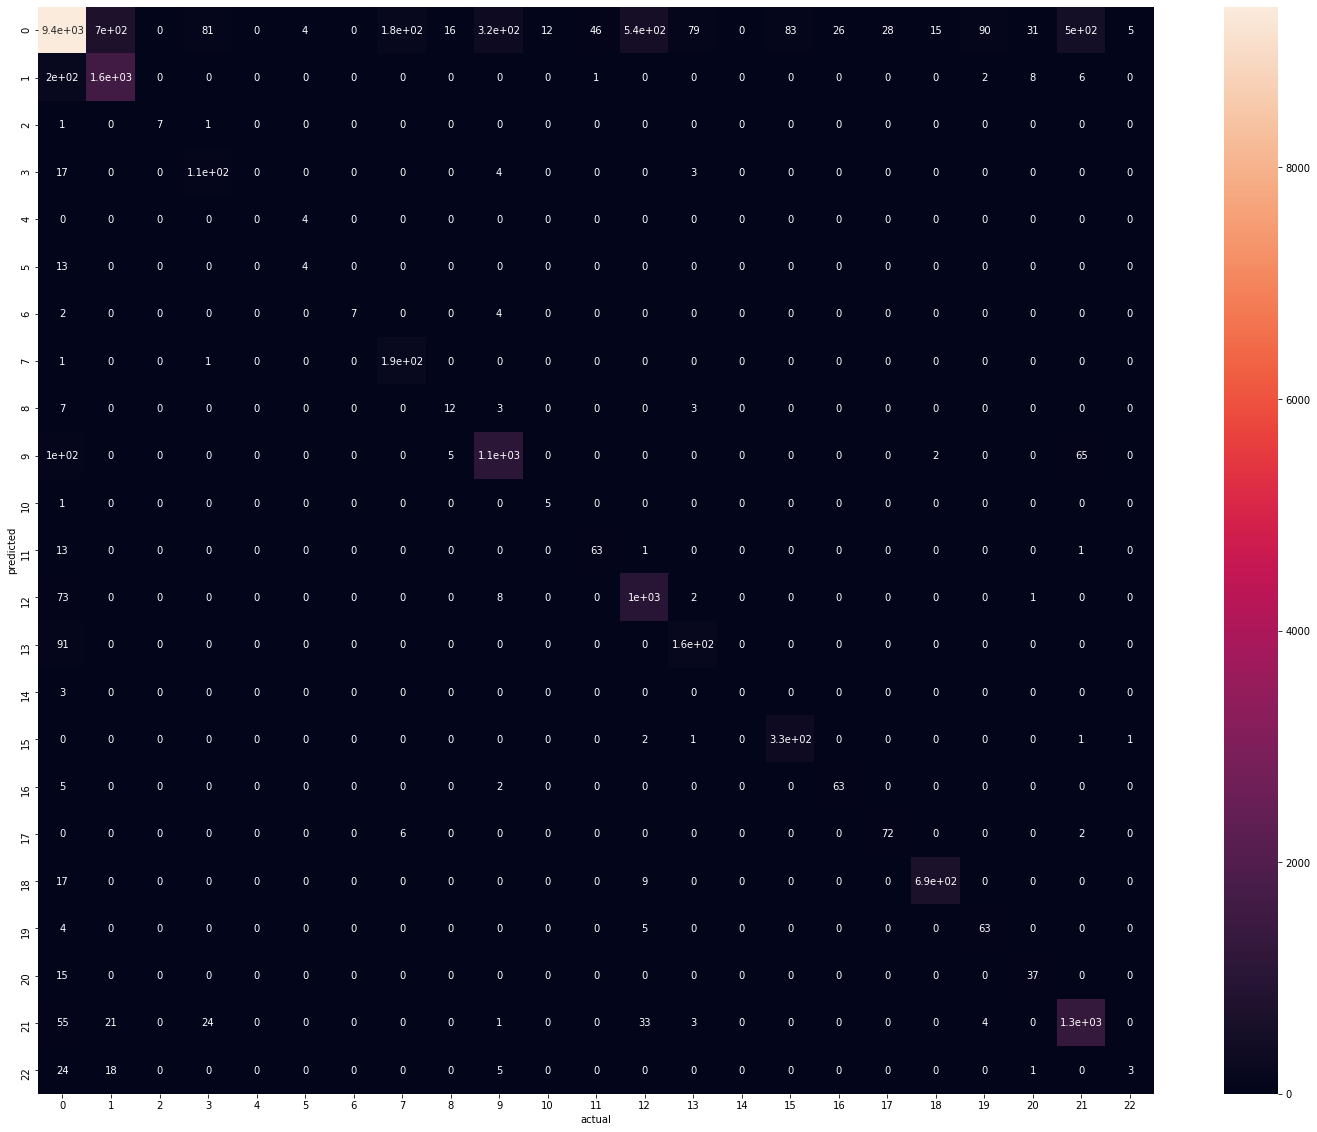

In [246]:
plt.figure(figsize=(25,20))

sns.heatmap(cm, annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [247]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [248]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [249]:
model = hub.load(module_url)

In [253]:
sentence_embeddings = model(corpus)
query = "covid"
query_vec = model([query])[0]

In [251]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
for sent in corpus:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Streaming output truncated to the last 5000 lines.
Sentence =  indiatoday educ today gk current affair stori agreement sign india chin ; similarity =  0.036866084
Sentence =  indiatoday technolog news stori relianc jio introduc work home pack rs everyth know ; similarity =  -0.002798997
Sentence =  indiatoday video battl cri emb mti ntyxnw ; similarity =  -0.013958268
Sentence =  indiatoday technolog news stori relianc jio introduc work home pack rs everyth know ; similarity =  -0.002798997
Sentence =  indiatoday technolog news stori relianc jio introduc work home pack rs everyth know ; similarity =  -0.002798997
Sentence =  indiatoday technolog news stori relianc jio introduc work home pack rs everyth know ; similarity =  -0.002798997
Sentence =  indiatoday technolog news stori relianc jio introduc work home pack rs everyth know ; similarity =  -0.002798997
Sentence =  indiatoday india video palghar lynch polic offic suspend ; similarity =  0.058529284
Sentence =  indiatoday india vid